In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

from surprise import Reader, Dataset
from wordcloud import WordCloud
%matplotlib inline

In [2]:
#install this package to use wordcloud
#pip install wordcloud

In [3]:
#not used 
#links_df = pd.read_csv('Data/links.csv')


#import the csv files to be analyzed
movies_df = pd.read_csv('Data/movies.csv')
ratings_df = pd.read_csv('Data/ratings.csv')
tags_df = pd.read_csv('Data/tags.csv')

#### The Movies CSV files contains 9742 movies containing the movieID, title, and genre. There are no null values in this dataset.

In [4]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [5]:
movies_df.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

#### The Ratings CSV file contains 100836 files which is more than the movies CSV file. There are also no null values in this dataset.

In [6]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [7]:
ratings_df.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

#### The Tags CSV dataset only contains 3683 entires. This means that tags only exists for approximatey 1/3 of the movies.

In [8]:
tags_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [9]:
tags_df.isna().sum()

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

#### While We look into the tag list to see if there are any common tag words that may help with the identification of similarities.

In [10]:
#create a list of the words that appear in the tag csv

list_of_words = []
for x in tags_df['tag']:
    list_of_words.append(x)
    
#converts the list of words into one long string to be processed into word cloud.
listToStr = ' '.join(map(str, list_of_words))

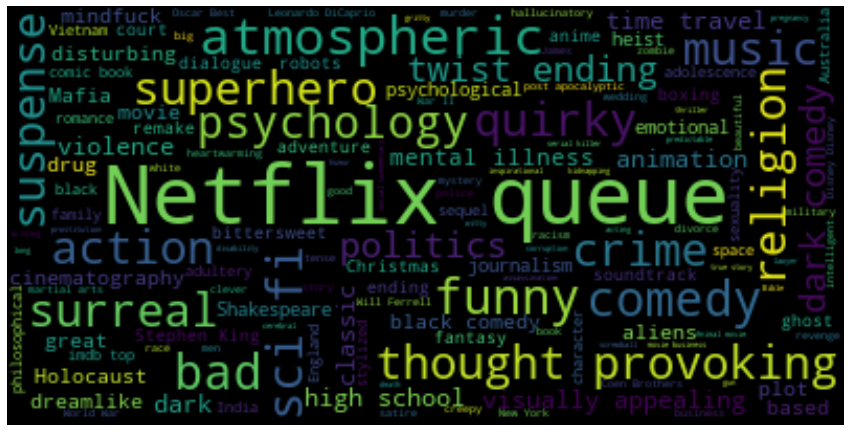

In [11]:
#This creates a word cloud of the words in the tag list
plt.subplots(figsize = (15,15))
words = listToStr
wordcloud= WordCloud().generate(words)
plt.imshow(wordcloud, interpolation = 'bilinear')

plt.axis('off')
plt.show()

From the top values in the tag CSV, we see that there is a sharp drop off from the most common phrase to the rest of the data.

In [12]:
tags_df['tag'].value_counts().head(10)

In Netflix queue     131
atmospheric           36
thought-provoking     24
superhero             24
funny                 23
surreal               23
Disney                23
religion              22
sci-fi                21
quirky                21
Name: tag, dtype: int64

#### We further explore the data and we see that there are 1589 unque different tags within and more than half the data only contains one instance. From this analysis, this set of data does not contain enough information to provide meaningful data.

In [13]:
tags_df['tag'].describe()

count                 3683
unique                1589
top       In Netflix queue
freq                   131
Name: tag, dtype: object

In [14]:
tags_df['tag'].value_counts().describe()

count    1589.000000
mean        2.317810
std         4.421902
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       131.000000
Name: tag, dtype: float64

#### We look further into the movies CSV file which contains the title and the genres of the movie. This contains a movieId which is consistent thoughout the datasets and will be used as a key to combine the datasets later on.

In [15]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


#### The ratings CSV file contains information on the users along with the movie and ratings they have given as well as a timestamp on when the rating was given. This timestamp is in seconds since 1/1/1970.

In [16]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [17]:
ratings_df.sort_values(by = 'timestamp', ascending = False)

,userId,movieId,rating,timestamp
81092,514,162,4.0,1537799250
81335,514,5246,1.5,1537757059
81336,514,5247,2.5,1537757040
81477,514,187595,3.0,1537674946
81475,514,187031,2.5,1537674927
...,...,...,...,...
66679,429,222,4.0,828124615
66680,429,225,4.0,828124615
66681,429,227,3.0,828124615
66705,429,343,3.0,828124615


#### The most recent and the very first review span across over 22 years

In [18]:
seconds_diff = ratings_df.sort_values(by = 'timestamp', ascending = False).max()['timestamp']- ratings_df.sort_values(by = 'timestamp', ascending = False).min()['timestamp']

#seconds/min/hour/day/year

seconds_diff/60/60/24/365

22.503635052004057

#### Taking a look at the user we see that most users have low numbers of reviews with a a majority of the users below 168 movie ratings while the top user has over 2600 movies.

In [19]:
ratings_df['userId'].value_counts().describe()

count     610.000000
mean      165.304918
std       269.480584
min        20.000000
25%        35.000000
50%        70.500000
75%       168.000000
max      2698.000000
Name: userId, dtype: float64

#### Plotting the top userse and we can see a huge drop in movies watched from the top 5 users and on.

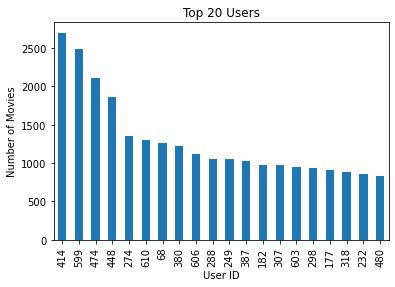

In [20]:
#Plot the top 20 users
ratings_df.groupby('userId')['movieId'].count().sort_values(ascending = False).head(20).plot(kind = "bar",
                                                                                    xlabel = 'User ID',
                                                                                    ylabel = 'Number of Movies',
                                                                                    title = "Top 20 Users");


In [21]:
# df_movies.groupby(by = 'userId')['title'].count().sort_values(ascending = False)

#### Here we combine the ratings and the movies together to get a better picture of the genres and titles.

In [22]:
df_movies = pd.merge(ratings_df,movies_df,on='movieId')

In [23]:
df_movies.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [24]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
 4   title      100836 non-null  object 
 5   genres     100836 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 5.4+ MB


#### Here we see that general reviews of movies are fairly high with most above 3.0

<AxesSubplot:title={'center':'Movie Rating Distribution'}, xlabel='Movie Ratings', ylabel='Number of Reviews'>

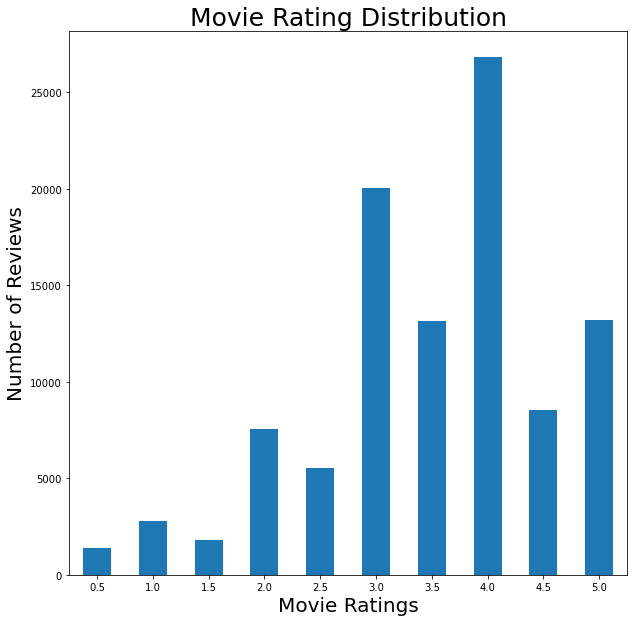

In [25]:
fig, ax = plt.subplots(figsize = (10,10))
ax.set_xlabel('Movie Ratings',size = 20)
ax.set_ylabel('Number of Reviews',size = 20)
ax.set_title('Movie Rating Distribution',size = 25)

df_movies.groupby('rating')["movieId"].count().plot(kind = "bar", xlabel = 'Movie Ratings', rot = 0)

In [26]:
df_movies['rating'].value_counts(normalize = True)

4.0    0.265957
3.0    0.198808
5.0    0.131015
3.5    0.130271
4.5    0.084801
2.0    0.074884
2.5    0.055040
1.0    0.027877
1.5    0.017762
0.5    0.013586
Name: rating, dtype: float64

#### Here we show the top rated movies in the movie dataset. This does not take into account of movies that have only 1 rating.

In [27]:
top_movies = df_movies.groupby('title')['rating'].mean().sort_values(ascending = False)
top_movies

title
Gena the Crocodile (1969)                  5.0
True Stories (1986)                        5.0
Cosmic Scrat-tastrophe (2015)              5.0
Love and Pigeons (1985)                    5.0
Red Sorghum (Hong gao liang) (1987)        5.0
                                          ... 
Don't Look Now (1973)                      0.5
Journey 2: The Mysterious Island (2012)    0.5
Joe Dirt 2: Beautiful Loser (2015)         0.5
Jesus Christ Vampire Hunter (2001)         0.5
Fullmetal Alchemist 2018 (2017)            0.5
Name: rating, Length: 9719, dtype: float64

In [28]:
# movies_grouped = df_movies.groupby('movieId').count()
# movies_grouped

In [29]:
# df_2 = df_movies.groupby('title')["userId","rating"].count()[lambda x: x> 1].sort_values(by = "rating", ascending = False)
# df_2

In [30]:
# df_2 = df_movies.groupby(['title','rating']).count()["userId"][lambda x: x> 1].sort_values(ascending = False)

In [31]:
# df_2

In [32]:
# df_2.sort_values()

In [33]:
# df_2.groupby('title')

In [34]:
# df_2 = df_2.to_frame()

In [35]:
# df

In [36]:
# df_2.drop('userId',axis = 1, inplace = True)

In [37]:
# df_2.sort_values(by='rating', ascending = False).tail(50)

In [38]:
#df_movies_dropped_1 = df_movies.drop()

In [39]:
# more_than_1_rating = []
# for u,i in movies_grouped['userId'].items():
#     if i > 1:
#         more_than_1_rating.append(u)

In [40]:
# a = []
# for item in df_movies['movieId']:
#     if item not in more_than_1_rating:
#         a.append(item)
        

In [41]:
# df_movies.sort_values(by= "userId")

#### We group the titles by movies with the most user ratings

In [42]:
title_count = df_movies.groupby(by = 'title')['userId'].count().sort_values(ascending = False)

In [43]:
title_count

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
                                            ... 
King Solomon's Mines (1950)                    1
King Solomon's Mines (1937)                    1
King Ralph (1991)                              1
King Kong Lives (1986)                         1
À nous la liberté (Freedom for Us) (1931)      1
Name: userId, Length: 9719, dtype: int64

In [44]:
title_count.head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: userId, dtype: int64

In [45]:
title_count.describe()

count    9719.000000
mean       10.375141
std        22.406220
min         1.000000
25%         1.000000
50%         3.000000
75%         9.000000
max       329.000000
Name: userId, dtype: float64

<AxesSubplot:title={'center':'Top Movies by User Count'}, ylabel='Movies'>

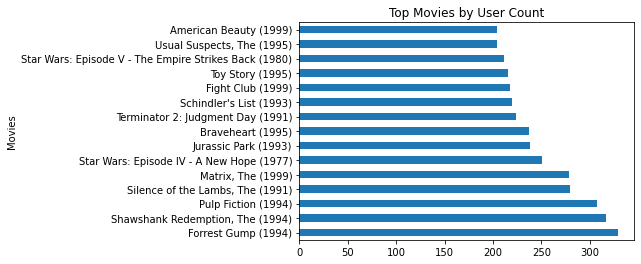

In [46]:
title_count.head(15).plot(kind = 'barh', xlabel = 'Movies', ylabel= 'User', title = 'Top Movies by User Count')

#### There are 9719 unique movies in this dataset

In [47]:
len(title_count.index.unique())

9719

In [48]:
# zz = []
# title_count.head()

# for x,y in title_count.items():
#     if y>1 and x not in zz:
#         zz.append(x)

In [49]:
# len(zz)

In [50]:
# fig, ax = plt.subplots(figsize = (10,10))
# #ax.set_xlabel('Number of Viewers',size = 15)
# #ax.set_ylabel('Movie',size = 10)
# #ax.set_title('Top 15 Movie User Views',size = 20)
# title_count.plot(kind = 'bar')
# plt.axis('off');


In [51]:
# df_t = df_movies.drop(['title','genres'],axis = 1)

In [52]:
#
#data = Dataset.load_from_df(df_t,Reader())

In [53]:
# data

#### Here we create a copy of the movies dataframe to analyze the genres.

In [54]:
movie_df2 = movies_df.copy()

In [55]:
movie_df2.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


#### We split the movies with multiple genres as seperate movies

In [56]:
#split the genres
movie_df2['genres'] = movie_df2['genres'].str.strip().str.split('|')

In [57]:
#create seperate rows for genres per movie
genres_df = movie_df2.explode('genres')

In [58]:
genres_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children
0,1,Toy Story (1995),Comedy
0,1,Toy Story (1995),Fantasy
...,...,...,...
9738,193583,No Game No Life: Zero (2017),Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Animation


In [59]:
genres_df.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children
0,1,Toy Story (1995),Comedy
0,1,Toy Story (1995),Fantasy
1,2,Jumanji (1995),Adventure
1,2,Jumanji (1995),Children
1,2,Jumanji (1995),Fantasy
2,3,Grumpier Old Men (1995),Comedy
2,3,Grumpier Old Men (1995),Romance


#### There are 20 unique genres including "not listed"

In [60]:
len(genres_df['genres'].unique())

20

In [61]:
genres_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children
0,1,Toy Story (1995),Comedy
0,1,Toy Story (1995),Fantasy
...,...,...,...
9738,193583,No Game No Life: Zero (2017),Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Animation


In [62]:
genres_df.groupby(['genres'])['movieId'].count().sort_values(ascending = False)

genres
Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
Name: movieId, dtype: int64

In [63]:
no_genre = genres_df.groupby('genres')

#### 34 movies are listed with an unkown genres and are listed as follows:

In [64]:
no_genre.get_group('(no genres listed)')

,movieId,title,genres
8517,114335,La cravate (1957),(no genres listed)
8684,122888,Ben-hur (2016),(no genres listed)
8687,122896,Pirates of the Caribbean: Dead Men Tell No Tal...,(no genres listed)
8782,129250,Superfast! (2015),(no genres listed)
8836,132084,Let It Be Me (1995),(no genres listed)
8902,134861,Trevor Noah: African American (2013),(no genres listed)
9033,141131,Guardians (2016),(no genres listed)
9053,141866,Green Room (2015),(no genres listed)
9070,142456,The Brand New Testament (2015),(no genres listed)
9091,143410,Hyena Road,(no genres listed)


#### The categories are broken down and more users tend to watch Drama and Comedy. 

<BarContainer object of 20 artists>

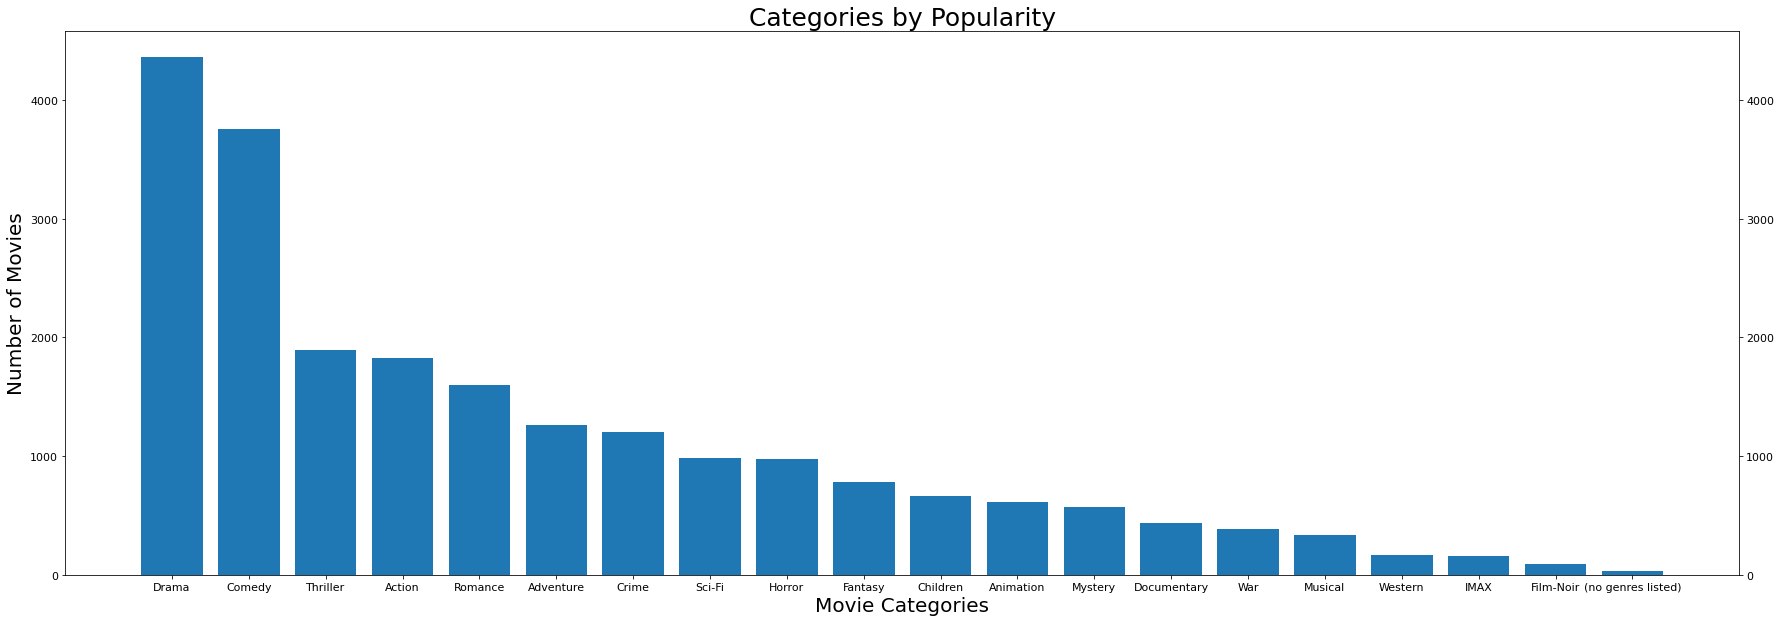

In [65]:
#initiate graph 
fig, ax = plt.subplots(figsize = (30,10))


#set the x and y parameters
x = genres_df.groupby(['genres'])['movieId'].count().sort_values(ascending = False).index
height = genres_df.groupby('genres')['movieId'].count().sort_values(ascending = False)

#set axes labels
ax.set_xlabel('Movie Categories',size = 20)
ax.set_ylabel('Number of Movies',size = 20)
ax.set_title('Categories by Popularity',size = 25)

#display y-yabel and ticks on both left and right side
plt.tick_params(labelright = True)
ax.yaxis.set_ticks_position('both')

#set the tick sizes for graph
plt.yticks(size = 11)
plt.xticks(rotation = 0, size = 11)

#plit the bar graph of categories vs movies
ax.bar(x,height)